In [45]:
import matplotlib.pyplot as plt
from sklearn import datasets, svm, metrics
from sklearn.naive_bayes import GaussianNB
import numpy as np

In [46]:
digits = datasets.load_digits()

In [47]:
images_and_labels = list(zip(digits.images, digits.target))

In [48]:
for index, (image, label) in enumerate(images_and_labels[:4]):
    plt.subplot(2,4, index+1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % label)

In [49]:
# To apply the classifier on this data, we need to flatten the image, to turn the data in a (samples, feature) matrix
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))


In [50]:
data.shape
clf = svm.SVC(gamma=0.001, C=10, kernel='rbf')
clfnb = GaussianNB()

In [51]:
# We learn the digits on the first half of the digits
# clf.fit(X,y) , X is the features and y is the labels
clf.fit(data[:n_samples // 2],digits.target[:n_samples // 2])
clfnb.fit(data[:n_samples // 2],digits.target[:n_samples // 2])

GaussianNB(priors=None)

In [52]:
# Now predict the value of the digits with the second half
expected = digits.target[n_samples // 2:]
predicted = clf.predict(data[n_samples // 2:])

In [54]:
# Now predict the values of the digits with the NB Classifier
predictedNB = clfnb.predict(data[n_samples//2:])

In [55]:
print("report %s: \n%s\n" %(clf, metrics.classification_report(expected, predicted)))
print("Confusion matrix: \n%s"%  metrics.confusion_matrix(expected, predicted))

report SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False): 
             precision    recall  f1-score   support

          0       1.00      0.99      0.99        88
          1       0.99      0.96      0.97        91
          2       0.99      0.99      0.99        86
          3       0.98      0.90      0.94        91
          4       0.99      0.96      0.97        92
          5       0.95      0.96      0.95        91
          6       0.99      0.99      0.99        91
          7       0.98      0.99      0.98        89
          8       0.94      1.00      0.97        88
          9       0.92      0.98      0.95        92

avg / total       0.97      0.97      0.97       899


Confusion matrix: 
[[87  0  0  0  1  0  0  0  0  0]
 [ 0 87  1  0  0  0  0  0  2  1]
 [ 0  0 85  1  0  0  0  0  0  0]
 [ 0  0  0 

In [56]:
# NB
print("report NB %s: \n%s\n" %(clfnb, metrics.classification_report(expected, predictedNB)))
print("Confusion matrix Naive Bayes: \n%s"%  metrics.confusion_matrix(expected, predictedNB))

report NB GaussianNB(priors=None): 
             precision    recall  f1-score   support

          0       0.98      0.95      0.97        88
          1       0.81      0.74      0.77        91
          2       0.87      0.84      0.85        86
          3       0.88      0.79      0.83        91
          4       1.00      0.73      0.84        92
          5       0.70      0.81      0.76        91
          6       0.96      0.99      0.97        91
          7       0.65      0.81      0.72        89
          8       0.61      0.76      0.68        88
          9       0.77      0.66      0.71        92

avg / total       0.82      0.81      0.81       899


Confusion matrix Naive Bayes: 
[[84  0  0  0  0  2  0  0  1  1]
 [ 0 67  2  0  0  0  0  2 13  7]
 [ 0  8 72  0  0  1  2  0  3  0]
 [ 0  2  2 72  0  2  0  2  9  2]
 [ 1  0  0  0 67  0  0 22  1  1]
 [ 0  2  0  4  0 74  1  3  2  5]
 [ 0  1  0  0  0  0 90  0  0  0]
 [ 0  0  2  0  0 12  0 72  2  1]
 [ 0  2  5  0  0  9  0  4 67 

In [63]:
images_and_predictions = list(zip(digits.images[n_samples // 2:], predicted))
for index, (image,prediction) in enumerate(images_and_predictions[:4]):
    plt.subplot(2,4, index+5)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Prediction: %i' % prediction)

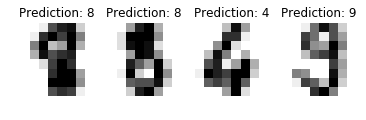

In [64]:
plt.show()

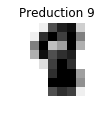

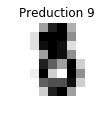

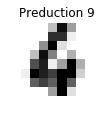

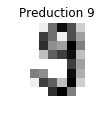

In [65]:
images_and_predictionNB = list(zip(digits.images[n_samples //2:],predictedNB))
for index, (image, predictionnb) in enumerate(images_and_predictionNB[:4]):
    plt.subplot(2,4,index+5)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Preduction %i' % prediction)
    plt.show()